In [2]:
import sys

sys.path.append("/home/jupyter/work/resources/DiplomDimReduction/")
import importlib

import config

importlib.reload(config)
import utils
from config import config_dict

importlib.reload(utils)
from itertools import combinations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import friedmanchisquare, wilcoxon
from sklearn.metrics import ndcg_score
from statsmodels.stats.multitest import multipletests
from utils import create_path, load_metrics

In [ ]:
# model_name = config_dict["dpr_model"]
# method_prefix = config_dict["dpr_prefix"]

# model_name = config_dict['ance_model']
# method_prefix = config_dict['ance_prefix']

# model_name = config_dict["tas-b_model"]
# method_prefix = config_dict["tas-b_prefix"]

In [26]:
dpr_ndcgs_path = '/home/jupyter/datasphere/project/DiplomDimReduction/data/metrics/marco/dpr/PCA_ndcgs.json'
ance_ndcgs_path = '/home/jupyter/datasphere/project/DiplomDimReduction/data/metrics/marco/ance/PCA_ndcgs.json'
tas_b_ndcgs_path = '/home/jupyter/datasphere/project/DiplomDimReduction/data/metrics/marco/tas_b/PCA_ndcgs.json'
boxplot_path = '/home/jupyter/datasphere/project/DiplomDimReduction/data/plots/marco/orig.png'

In [14]:
orig_dim = '768'

In [16]:
dpr_ndcgs = load_metrics(dpr_ndcgs_path)[orig_dim]
ance_ndcgs = load_metrics(ance_ndcgs_path)[orig_dim]
tas_b_ndcgs = load_metrics(tas_b_ndcgs_path)[orig_dim]

In [18]:
ndcgs = {
    'DPR': dpr_ndcgs['ndcgs'],
    'ANCE': ance_ndcgs['ndcgs'],
    'TAS_B': tas_b_ndcgs['ndcgs']
        }


In [19]:
df = pd.DataFrame(ndcgs)
df.describe()

,DPR,ANCE,TAS_B
count,43.000000,43.000000,43.000000
mean,0.864953,0.866676,0.856697
std,0.164375,0.169136,0.169834
min,0.456468,0.456468,0.470850
25%,0.828987,0.792878,0.705072
50%,0.921787,0.921787,0.946902
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


/home/jupyter/datasphere/project/DiplomDimReduction/data/plots/marco exists.


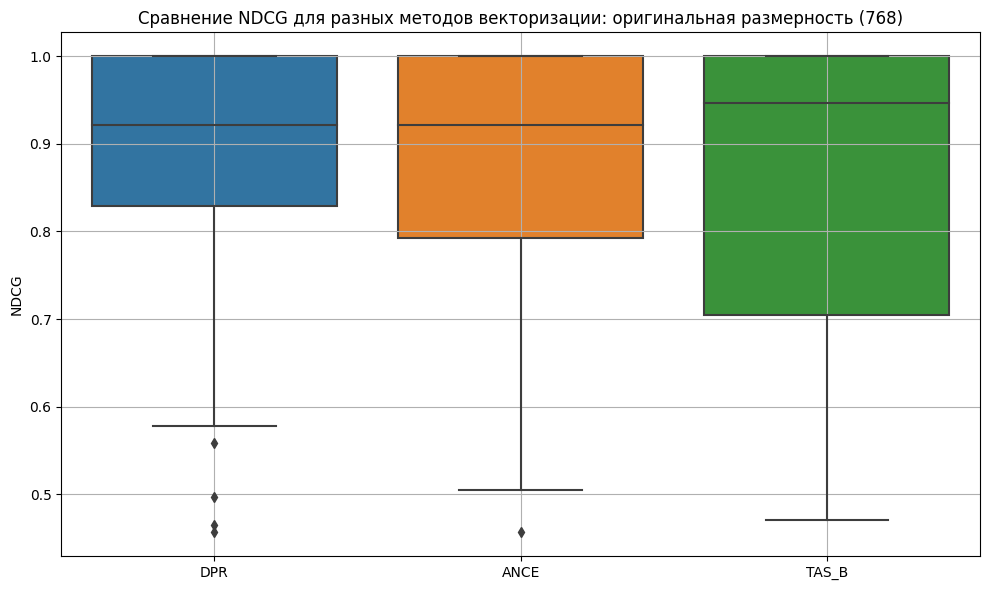

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title(
    f"Сравнение NDCG для разных методов векторизации: оригинальная размерность (768)"
)
plt.ylabel("NDCG")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
create_path(boxplot_path)
plt.savefig(boxplot_path)
plt.show()